# <div style="text-align: center">Capstone Project - The Battle of Neighborhoods</div>
## <div style="text-align: center">Explore India - Business Opportunities</div>

## Contents

> - [Introduction](#Introduction)
> - [Data Collection and Analysis](#Data-Collection-and-Analysis)
     - [Data Sources](#Data-Sources)
     - [Data Cleaning and Structuring](#Data-Cleaning-and-Structuring)
     - [Data Analysis](#Data-Analysis)
> - [Exploratory Data Analysis](#Exploratory-Data-Analysis)
> - [Indian State Capital Cities](#Indian-State-Capital-Cities)
> - [Indian Cities](#Indian-Cities)
> - [Verdict](#Verdict)
> - [Conclusion](#Conclusion)
>

## Introduction

India is the second-most populous country, the seventh-largest country by area and the most populous democracy in the world. The trending population is around 1.35 billion. India has 29 states and 7 union territories with around 300+ popular cities.  The goal of the analysis is to analyse the popular venues with the state capitals and popular cities in India along with the population data of each city/capitals to understand their influence over trending venues and find out the best possible business category to start a business in India.

This analysis answers the following for an entrepreneur who wants to start a business in India, 
        1. What are the trending businesses across Indian state capitals?
        2. What are the trending businesses across Indian cities?
        3. Does population of a state capital or city influence the business trends?
        4. Should I start a business in a state capital or any cities in India?
        5. Which category of business should I consider?
        
[<div style="text-align: right"> Back to Contents </div>](#Contents)
    

## Data Collection and Analysis

Based on the questions listed in Business Problem, the data we will be looking for our analysis are,

    1. Indian state capital list
    2. Indian cities list
    3. Population data of Indian state capitals and cities
    4. Location data of Indian state capitals and cities
    5. Trending venue data of Indian state capitals and cities
    
### Data Sources
    
#### Indian State Capitals
Capital cities data are required for anlayzing popular venues across state capitals. We will get this data from wikipedia [List of state and union territory capitals in India](https://en.wikipedia.org/wiki/List_of_state_and_union_territory_capitals_in_India). We will only take State and Administrative Capital column from this data set.
#### Indian Cities and Population data
There are around 300+ popular cities in India which we can get from wikipedia [List of cities in India by population](https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population). Along with the cities list, we also get population data from this data set. 

_Note: This analysis is based on 2011 census population data. Though this might have increased approximately by 17% to 20% over the decade, we go with the currently available data set for this analysis. However, the whole analysis can be reused when the new dataset is available._

#### Location Data
To get the venue details of cities and capitals, we will require their latitude and longitude data. We will use python's geopy library to get these details. To save time, the location details are also captured on the first run to a csv file which you can download from github repository.

#### Venue Data
To get the venue details of cities and capitals, we will use [foursquare.com](https://developer.foursquare.com/) apis through developer account.

### Data Cleaning and Structuring

There are two primary data sources we use for collecting Indian state capitals and cities details. Both of them are from wikipedia pages, but with different column sets. The state capitals table has no population data and both of the data tables doesn't have geo location data. Though the wikipedia data sets have a lot of details in different columns, we are only interested in City/Capital names, State names (required for data frame joins) and population data. We will dropout rest of the columns during data cleaning process. Also, we will have to remove subscript, superscript notations used in wiki pages for reference links. Python geopy library will be used to collect geo location of each city and the final dataset will have data like the below sample,

&nbsp;
<table>
    <tr><th>State</th>	<th>City</th>	<th>Latitude</th>	<th>Longitude</th>	<th>Population</th></tr>
    <tr><td>Andhra Pradesh</td><td>Amaravati</td><td>16.516910</td><td>80.500259</td><td>103000</td></tr>
    <tr><td>Bihar</td><td>Patna</td><td>25.609324</td><td>85.123525</td><td>1684222</td></tr>
    <tr><td>Chandigarh</td><td>Chandigarh</td><td>30.719402</td><td>76.764655</td><td>1028667</td></tr>
    <tr><td>Delhi</td><td>New Delhi</td><td>28.614179</td><td>77.202266</td><td>249998</td></tr>
    <tr><td>Gujarat</td><td>Gandhinagar</td><td>23.223288</td><td>72.649227</td><td>206167</td></tr>
</table>

&nbsp;

Since state capitals data and cities data are from different wikipedia pages, there are high chances that we will be missing or having mismatched capital city names (for population data collection). We will use dataframe merge method to compare both the dataframes to find out missing capital cities and manually add missing details through a csv import. With the population category added to our dataset, we will use foursquare api to collect venue details of each Indian state capitals and cities and add them to our dataset for analysis. With the foursquare data added, our dataset will look like the below sample,

&nbsp;

<table>
    <tr><th>Capital</th><th>Latitude</th><th>Longitude</th><th>Venue</th><th>Venue Latitude</th><th>Venue Longitude</th><th>Venue Category</th></tr>
<tr><td>Mumbai</td><td>18.938771</td><td>72.835335</td><td>Royal China</td><td>18.938715</td><td>72.832933</td><td>Chinese Restaurant</td></tr>
<tr><td>Mumbai</td><td>18.938771</td><td>72.835335</td><td>Town House Cafe</td><td>18.938550</td><td>72.833464</td><td>Bar</td></tr>
<tr><td>Mumbai</td><td>18.938771</td><td>72.835335</td><td>Sher-E-Punjab</td><td>18.937944</td><td>72.837853</td><td>Indian Restaurant</td></tr>
<tr><td>Mumbai</td><td>18.938771</td><td>72.835335</td><td>Britannia &amp; Co.</td><td>18.934683</td><td>72.840183</td><td>Parsi Restaurant</td></tr>
<tr><td>Mumbai</td><td>18.938771</td><td>72.835335</td><td>Cafe Excelsior</td><td>18.937701</td><td>72.833566</td><td>Café</td></tr>
</table>

&nbsp;

### Data Analysis

We will start with population analysis of Indian cities and state capitals by categorizing the population into High, Medium and Low populated areas. This will give us an insight of population across Indian state capitals and cities. Folium maps will come handy to plot the population stats on India map for visual analysis.

With the venue data collected using Foursquare.com apis that are merged with both the datasets of Indian state capitals and cities, we will use KMeans clustering technique to cluster popular venues against each data points (locations) and find out differences and similarities of venues against population of the location.

Finally, we will compare both the datasets of Indian state capitals and cities to identify which venue is more popular on both the datasets and are there any differences, similarities of venue categories between state capital cities and regular cities.


[<div style="text-align: right"> Back to Contents </div>](#Contents)

## Exploratory Data Analysis
As explained in the above section, we will start with population data analysis of Indian capital cities and other cities in India. First we will segment the population data into three categories as High, Medium and Low using data frame quanitle method with 34%, 33%, 33% partitions respectively. The result shows a common trend of population across Indian state capitals whereas a mixed share of population across other Indian cities. Color markings Red denotes high population, yellow for medium population, green for low population.

Let's import required modules for this analysis

In [599]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium
import json, requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import geocoder # import geocoder
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
%matplotlib inline

Defining couple of generic functions to be used later

In [600]:

# function that formats data frame from wiki tables
def formatDF(data):
    data.columns=data.iloc[0]
    data= data.reindex(data.index.drop(0)).reset_index(drop=True)
    data.columns.name = None
    return data

# function that returns latitude, logitude for the given address
def getLatLong(address):
    success=False
    counter=5 #5 attempts
    while((not success) and counter>0):
        counter-=1
        try:
            geolocator = Nominatim(user_agent="loc_explorer")
            location = geolocator.geocode(address)
            success=True
            return {'latitude': location.latitude, 'longitude': location.longitude}
        except:
            success=False
    if(not success):
        return {'latitude': None, 'longitude': None}


Let's collect the list of state capital cities of India from Wikipedia. We are only interested in State and Capital columns of the dataset, so we can drop rest of the columns.

In [601]:
# pandas way of retriving web data
df_capitals=pd.read_html('https://en.wikipedia.org/wiki/List_of_state_and_union_territory_capitals_in_India')
df=formatDF(df_capitals[1])
# drop unnecessary columns out - Keep only State and Capital
df.drop(['Legislative capital','Judicial capital','Year of establishment','Former capital','No.'],inplace=True, axis=1)
# rename columns as necessary
df.rename(columns={'State orunion territory':'State','Administrative capital':'Capital'},inplace=True)
# wiki data has reference links with square brackets, lets get rid of them
df['State']=df['State'].apply(lambda x: x.split('(')[0].split('[')[0].strip())
df['Capital']=df['Capital'].apply(lambda x: x.split('(')[0].split('[')[0].strip())
df.head()

,State,Capital
0,Andaman and Nicobar Islands,Port Blair
1,Andhra Pradesh,Amaravati
2,Arunachal Pradesh,Itanagar
3,Assam,Dispur
4,Bihar,Patna


Now we have the list of state capitals, let us get the geo coordinates for each of them. In the interest of time, I have attached the csv file with preloaded location data. If you need it from geopy module, uncomment the lines below and comment out the line which loads from csv. Note, we are renaming the Capital column name to City for time being, this will be revereted back to Capital once we do the data processing with Cities dataset.

In [602]:
#loc=pd.DataFrame(columns=['Capital','State','Latitude','Longitude'])
#for index, row in df.iterrows():
#    print('Processing {}, {} ({})'.format(row['State'],row['Capital'],index))
#    ll=getLatLong('{}, {}, India'.format(row['Capital'],row['State']))
#    print(ll)
#    loc=loc.append(pd.Series([row['Capital'],row['State'],ll['latitude'],ll['longitude']], index=loc.columns),ignore_index=True)
#loc.to_csv('CapitalLocations.csv', index=False)
loc=pd.read_csv('CapitalLocations.csv')
df2=pd.merge(df,loc,on=['Capital','State'])
df2.rename(columns={'Capital':'City'},inplace=True)
df2.head()

,State,City,Latitude,Longitude
0,Andaman and Nicobar Islands,Port Blair,11.664535,92.739045
1,Andhra Pradesh,Amaravati,16.516910,80.500259
2,Arunachal Pradesh,Itanagar,27.097966,93.623729
3,Assam,Dispur,26.151308,91.793381
4,Bihar,Patna,25.609324,85.123525


Let's do the same for getting 301 Indian cities from Wikipedia. Note that this data set also includes capital cities and population data

In [603]:
# pandas way of retriving web data
df_cities=pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population')
dfp=formatDF(df_cities[0])
# drop unnecessary columns out - Keep only State, City and Population data
dfp.drop(['Rank','Population(2001)'],inplace=True, axis=1)
# rename the columns as necessary
dfp.rename(columns={'Population(2011)[3]':'Population','State or union territory':'State'},inplace=True)
# wiki data has reference links with square brackets, lets get rid of them, also any bracket contents
dfp['City']=dfp['City'].apply(lambda x: x.split('(')[0].split('[')[0].strip())
dfp['State']=dfp['State'].apply(lambda x: x.split('(')[0].split('[')[0].strip())
# set the data type of population data as integer
dfp=dfp.astype({'Population':'int'})
# sort the dataframe by population data in descending order
dfp.sort_values(by=['Population'],inplace=True,ascending=False)
print('Number of cities:',len(dfp['City']))
dfp.head()

Number of cities: 301


,City,Population,State
0,Mumbai,12442373,Maharashtra
1,Delhi,11007835,Delhi
2,Bangalore,8436675,Karnataka
3,Hyderabad,6809970,Telangana
4,Ahmedabad,5570585,Gujarat


Merge the cities dataframe with capitals dataframe, this will bring Latitude, Longitude and Population to state capitals dataframe. 

In [647]:
# merge capital cities data with cities dataset on City, State match 
dff=pd.merge(df2,dfp,on=['City','State'])
dff.head()

,State,City,Latitude,Longitude,Population
0,Andhra Pradesh,Amaravati,16.516910,80.500259,103000
1,Bihar,Patna,25.609324,85.123525,1684222
2,Chandigarh,Chandigarh,30.719402,76.764655,1028667
3,Delhi,New Delhi,28.614179,77.202266,249998
4,Gujarat,Gandhinagar,23.223288,72.649227,206167


As the data are from two different wiki links, there are possibilities that we have some missing capital cities for which we dont have Population data. We can find out the differences by dataframe merge method. The missing cities data are already identified and population data are updated manually on a csv file. If you want to try out, uncomment first two lines below and comment out the third line to find the dataframe differences.

In [605]:
#tmp = df2.merge(dff, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
#tmp.to_csv('MissingCities.csv')
tmp=pd.read_csv('MissingCities.csv')
dfc=pd.concat([dff,tmp])
dfc.sort_values(by=['Population'],inplace=True,ascending=False)
dfc=dfc.reset_index(drop=True)
dfc.rename(columns={'City':'Capital'},inplace=True)
print('Final processed cities: ',len(dfc['Capital']))
dfc.head()

Final processed cities:  36


,State,Capital,Latitude,Longitude,Population
0,Maharashtra,Mumbai,18.938771,72.835335,12442373
1,Karnataka,Bangalore,12.979120,77.591300,8436675
2,Telangana,Hyderabad,17.388786,78.461065,6809970
3,Tamil Nadu,Chennai,13.080172,80.283833,4681087
4,West Bengal,Kolkata,22.545412,88.356775,4486679


In [606]:
# Note:Chandigarh is a special city acts as capital of two neighbor states but is a union territory by own
print("Duplicates:\n",dfc.duplicated(subset=['Capital'],keep=False).value_counts())

# We only look at capital city here, lets drop the duplicate rows (2 States might go off the list)
dfc.drop_duplicates(subset ="Capital", keep = 'first', inplace = True)

dfc.reset_index(drop=True,inplace=True)

print("Dropped duplicates:\n",dfc.duplicated(subset=['Capital'],keep=False).value_counts())
print('Cities: ',len(dfc['Capital']))
dfc.head()

Duplicates:
 False    33
True      3
dtype: int64
Dropped duplicates:
 False    34
dtype: int64
Cities:  34


,State,Capital,Latitude,Longitude,Population
0,Maharashtra,Mumbai,18.938771,72.835335,12442373
1,Karnataka,Bangalore,12.979120,77.591300,8436675
2,Telangana,Hyderabad,17.388786,78.461065,6809970
3,Tamil Nadu,Chennai,13.080172,80.283833,4681087
4,West Bengal,Kolkata,22.545412,88.356775,4486679


Before starting the analysis, lets segment the population data into three categories as High, Medium and Low using data frame quanitle method with 34%, 33%, 33% partitions respectively. 

In [607]:
low=round(dfc['Population'].quantile(q=0.33))
medium=round(dfc['Population'].quantile(q=0.66))
conditions=[
    (dfc['Population'] <= low),
    (dfc['Population'] > low) & (dfc['Population'] <= medium), 
    (dfc['Population'] > medium)
]
choices=['Low','Medium','High']
dfc['Category']=np.select(condlist=conditions,choicelist=choices)
dfc.head()


,State,Capital,Latitude,Longitude,Population,Category
0,Maharashtra,Mumbai,18.938771,72.835335,12442373,High
1,Karnataka,Bangalore,12.979120,77.591300,8436675,High
2,Telangana,Hyderabad,17.388786,78.461065,6809970,High
3,Tamil Nadu,Chennai,13.080172,80.283833,4681087,High
4,West Bengal,Kolkata,22.545412,88.356775,4486679,High


[<div style="text-align: right"> Back to Contents </div>](#Contents)
## Indian State Capital Cities
We will start with processing Indian state capital cities dataframe and proceed to other Indian cities, finally we will have a comparison report of both datasets.

In [611]:
# get latitude and longitude of India
ll=getLatLong('India')

# create map of India with cities marked using latitude and longitude values of the cities
map_india = folium.Map(width=500,height=500,location=[ll['latitude'],ll['longitude']], zoom_start=4)

# add markers to map
for lat, lng, Population, City, Category in zip(dfc['Latitude'], dfc['Longitude'], dfc['Population'], dfc['Capital'], dfc['Category']):
    label = '{}, Population: {}'.format(City, Population)
    label = folium.Popup(label, parse_html=True)
    c='green'
    fc='#55aa77'
    if(Category=='High'):
        c='red'
        fc='#ff7755'
    elif(Category=='Medium'):
        c='yellow'
        fc='#aa9955'
    folium.CircleMarker([lat, lng], radius=5, popup=label, color=c, fill=True, fill_color=fc, fill_opacity=0.7,
        parse_html=False).add_to(map_india)  
    
map_india

The result above shows a common trend of population across Indian state capitals when plotted on a folium map. Color markings Red denotes high population, yellow for medium population, green for low population.

Let’s have a look at the top 10 populated capital cities. India’s most popular City of Dreams - Mumbai tops with around 12 million people, followed by Silicon Valley of India - Bangalore, City of Pearls - Hyderabad and the Banking Capital of India- Chennai.

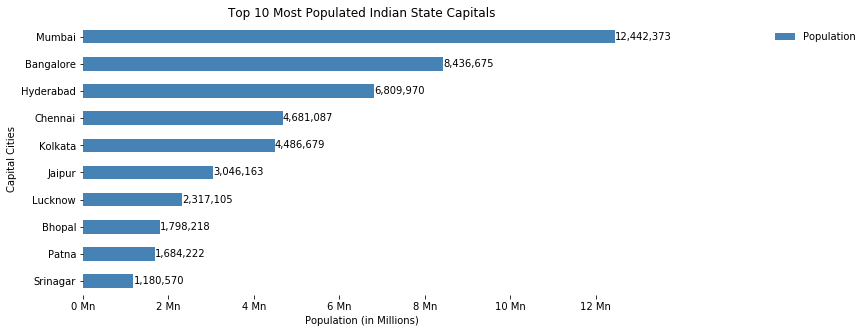

In [612]:
dfc_plt=dfc[['Capital','Population']].set_index(
    "Capital",
    drop=True).sort_values(
    by=['Population'],
    ascending=True)['Population'].tail(10)
ax=dfc_plt.plot(kind='barh', figsize=(10,5), color='steelblue')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,t:'{} Mn'.format(int(np.round(v/1000000)))))

plt.title('Top 10 Most Populated Indian State Capitals')
plt.ylabel('Capital Cities')
plt.xlabel('Population (in Millions)')
for index, value in enumerate(dfc_plt): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value, index - 0.10), color='black')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
plt.show()

It’s not so surprising to see the above top list as those are the world popular cities that can attract more people. Let us continue with venue data analysis using foursquare apis.

For venue analysis, we will have to collect venue details of each of these cities using foursquare.com explore api.

Let us define the functions to be used later for foursquare data processing. Note that, the client_id and client_secret data are are masked with xxxx. To use the below getFoursquareJson function, make sure to use a valid client_id and client_secret.

In [613]:

def getFoursquareJson(lat,lng,_limit=100,_option='explore'):
    url = 'https://api.foursquare.com/v2/venues/{}'.format(_option)
    params = dict(
        client_id='3SPEOINY0KTWJE1TB3IMXQ1CLKNR0TTTJJTTU1B1IBSZW1JP',
        client_secret='VJ2Z2P1YAZJ43LU1TYT4JT3FYD1CSIKH2MRNXXJ3E3FLS1JG',
        v='20180605',
        ll='{},{}'.format(lat,lng),
        limit=_limit
        )
    return requests.get(url=url, params=params).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

Before trying out with all the capital cities, let us try out one single city for better understanding. Index 1 is Bangalore, Karnataka State. Let us look at the Json response of foursquare server.

In [614]:
index=1
address = '{}, {}, India'.format(dfc.loc[index, 'Capital'], dfc.loc[index, 'State'])
results = getFoursquareJson(dfc.loc[index,'Latitude'],dfc.loc[index,'Longitude'],200)
results

{'meta': {'code': 200, 'requestId': '5ee0942574cf2678a2d2749c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'suggestedRadius': 1578,
  'headerLocation': 'Bangalore',
  'headerFullLocation': 'Bangalore',
  'headerLocationGranularity': 'city',
  'totalResults': 98,
  'suggestedBounds': {'ne': {'lat': 12.994386172606708,
    'lng': 77.60638771562276},
   'sw': {'lat': 12.964746619862806, 'lng': 77.57574665827659}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bbc4513e45295217db855a4',
       'name': 'Cubbon Park',
       'location': {'address': 'M G Road',
        'lat': 12.977042175203783,
        'lng': 77.59527683258057,
        'labeledLatLngs': [{'label': 'display',
          'lat': 12.977

Convert the json result of foursquare into dataframe using json_normalize function and process the dataframe to see the number of venues returned for Bangalore location.

In [615]:
venues = json_normalize(results['response']['groups'][0]['items']) 
columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
venues =venues.loc[:, columns]
venues['venue.categories'] = venues.apply(get_category_type, axis=1)
venues.columns = [col.split(".")[-1].title() for col in venues.columns]

print('Total venues returned for {} ({}):{} '.format(dfc.loc[index, 'Capital'],dfc.loc[index, 'State'], venues.shape[0]))
venues.head()

Total venues returned for Bangalore (Karnataka):98 


,Name,Categories,Lat,Lng
0,Cubbon Park,Park,12.977042,77.595277
1,JW Marriott Hotel Bengaluru,Hotel,12.972362,77.595051
2,Taj West End,Hotel,12.984572,77.584893
3,M. Chinnaswamy Stadium,Cricket Ground,12.978144,77.599223
4,Infinitea,Tea Room,12.987157,77.594835


Now the tough job, let us do the same what we did for Banglore with all the capital cities in our dataframe and collect the results in a dataframe. This will take a little time as the loop will make a webapi call to foursquare.com for each of the cities in our dataframe.

In [618]:
venues_list=[]
for i in range(dfc.shape[0]):
    address = '{}, {}, India'.format(dfc.loc[i, 'Capital'], dfc.loc[i, 'State'])
    print(address)
    venues = getFoursquareJsonEx(dfc.loc[i,'Latitude'],dfc.loc[i,'Longitude'],200)
    columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues =venues.loc[:, columns]
    venues['venue.categories'] = venues.apply(get_category_type, axis=1)
    venues.columns = [col.split(".")[-1].title() for col in venues.columns]
    venues_list.append([(
            dfc.loc[i,'Capital'], 
            dfc.loc[i,'Latitude'],dfc.loc[i,'Longitude'], 
            venues.loc[j,'Name'], 
            venues.loc[j,'Lat'], 
            venues.loc[j,'Lng'],  
            venues.loc[j,'Categories']) for j in range(venues.shape[0])])
nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Capital', 
              'Capital Latitude', 
              'Capital Longitude', 
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Category']
nearby_venues.head()    

Mumbai, Maharashtra, India
Bangalore, Karnataka, India
Hyderabad, Telangana, India
Chennai, Tamil Nadu, India
Kolkata, West Bengal, India
Jaipur, Rajasthan, India
Lucknow, Uttar Pradesh, India
Bhopal, Madhya Pradesh, India
Patna, Bihar, India
Srinagar, Jammu and Kashmir, India
Ranchi, Jharkhand, India
Chandigarh, Haryana, India
Naya Raipur, Chhattisgarh, India
Dispur, Assam, India
Bhubaneswar, Odisha, India
Dehradun, Uttarakhand, India
Thiruvananthapuram, Kerala, India
Agartala, Tripura, India
Aizawl, Mizoram, India
Leh, Ladakh, India
Imphal, Manipur, India
New Delhi, Delhi, India
Pondicherry, Puducherry, India
Gandhinagar, Gujarat, India
Daman, Dadra and Nagar Haveli and Daman and Diu, India
Shimla, Himachal Pradesh, India
Shillong, Meghalaya, India
Kohima, Nagaland, India
Amaravati, Andhra Pradesh, India
Gangtok, Sikkim, India
Port Blair, Andaman and Nicobar Islands, India
Itanagar, Arunachal Pradesh, India
Panaji, Goa, India
Kavaratti, Lakshadweep, India


,Capital,Capital Latitude,Capital Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mumbai,18.938771,72.835335,Royal China,18.938715,72.832933,Chinese Restaurant
1,Mumbai,18.938771,72.835335,Town House Cafe,18.938550,72.833464,Bar
2,Mumbai,18.938771,72.835335,Sher-E-Punjab,18.937944,72.837853,Indian Restaurant
3,Mumbai,18.938771,72.835335,Britannia & Co.,18.934683,72.840183,Parsi Restaurant
4,Mumbai,18.938771,72.835335,Cafe Excelsior,18.937701,72.833566,Café


[<div style="text-align: right"> Back to Contents </div>](#Contents)
#### Venue Data Analysis
Our further analysis is going to be on how this population trend affects the popular venues in each of these cities. Let us look at the number of venues returned for all Indian state capitals and the number of venue categories.

In [619]:
#nearby_venues.to_csv('capital_venues.csv')
print('There are total {} venues in all Indian state capitals and there are {} uniques venue categories.'.format(
    nearby_venues.shape[0],len(nearby_venues['Venue Category'].unique())))

There are total 1457 venues in all Indian state capitals and there are 196 uniques venue categories.


Lets do city wise analyises based on venues by identifying the frequency of venue occurence against each city.

In [620]:
venue_dummies = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add capital column back to dataframe
venue_dummies['Capital'] = nearby_venues['Capital'] 

# move capital column to the first column
columns = [venue_dummies.columns[-1]] + list(venue_dummies.columns[:-1])
venue_dummies = venue_dummies[columns]

venue_dummies.head()

,Capital,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Arcade,Art Gallery,...,Track Stadium,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Zoo
0,Mumbai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mumbai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mumbai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mumbai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mumbai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [621]:
venues_grouped = venue_dummies.groupby('Capital').mean().reset_index()
print(venues_grouped.shape)
venues_grouped

(34, 197)


,Capital,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Arcade,Art Gallery,...,Track Stadium,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Zoo
0,Agartala,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.333333,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.00000
1,Aizawl,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.00000
2,Amaravati,0.250000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.125,0.000000,0.00000
3,Bangalore,0.000000,0.00000,0.010204,0.000000,0.00,0.000000,0.010204,0.010204,0.00,...,0.000000,0.00,0.000000,0.00,0.010204,0.000000,0.010204,0.000,0.010204,0.00000
4,Bhopal,0.000000,0.00000,0.000000,0.023810,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.023810,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.00000
5,Bhubaneswar,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.00000
6,Chandigarh,0.333333,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.111111,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.00000
7,Chennai,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.023810,0.00,0.023810,0.011905,0.000000,0.000,0.000000,0.00000
8,Daman,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.038462,0.00,...,0.000000,0.00,0.076923,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.00000
9,Dehradun,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.027778,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.00000


The venue details collected for all the Indian state capitals are grouped together by the name of the city in the data frame to find the frequency of each of the venue category occurrence and the top 15 high occurrence of the venue category is plotted in following graph. The result shows Indian Restaurant business is the leading player across Indian city capitals followed by Hotels and Cafes. Based on frequency, lets plot a bar graph to see all top 15. 

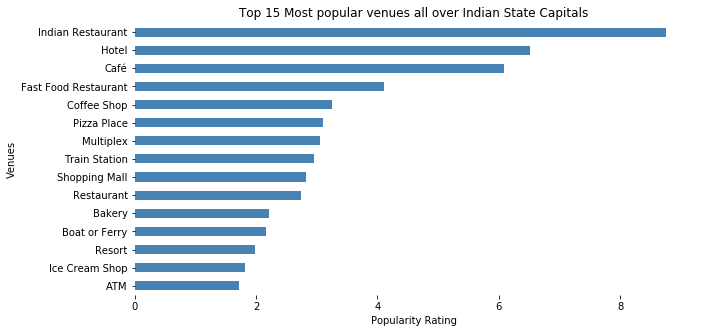

In [622]:
popular=venues_grouped.describe().loc['mean'].sort_values().tail(15)

ax=popular.plot(kind='barh', figsize=(10,5), color='steelblue')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,t: int(np.round(v*100))))

plt.title('Top 15 Most popular venues all over Indian State Capitals')
plt.ylabel('Venues')
plt.xlabel('Popularity Rating')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
plt.show()

In [624]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let us create a top venues dataframe to list out top 10 most common venues for each capital cities in our dataframe.

In [625]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Capital']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
top_venues_sorted = pd.DataFrame(columns=columns)
top_venues_sorted['Capital'] = venues_grouped['Capital']

for ind in np.arange(venues_grouped.shape[0]):
    top_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

top_venues_sorted.head()

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agartala,Train Station,Coffee Shop,Men's Store,Multiplex,Salad Place,Zoo,Farmers Market,Food Court,Food & Drink Shop,Food
1,Aizawl,Restaurant,Hotel,Park,Shopping Mall,Zoo,Electronics Store,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop
2,Amaravati,ATM,Pharmacy,Indian Restaurant,Harbor / Marina,Waterfront,Accessories Store,Food Truck,Food Court,Food & Drink Shop,Food
3,Bangalore,Indian Restaurant,Hotel,Lounge,Ice Cream Shop,Japanese Restaurant,Italian Restaurant,Breakfast Spot,Park,Bookstore,Restaurant
4,Bhopal,Pizza Place,Indian Restaurant,Coffee Shop,Bakery,Asian Restaurant,Diner,Hotel,Fast Food Restaurant,Café,Department Store


There are many models for clustering, we will be using k-means clustering – one of the vastly used clustering model that especially useful if you need to quickly discover insights from unlabeled data. Time to apply k-means clustering model on our dataframe to cluster the popular venues.

In [626]:
capitals_grouped_clustering = venues_grouped.drop('Capital', 1)

First, let us use Elbow method to identify the K value for k-means clustering algorithm.

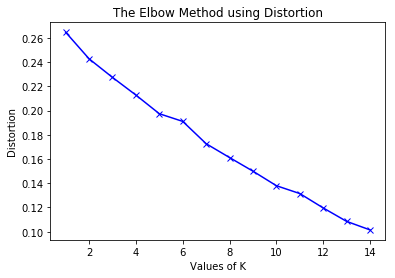

In [629]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,15)
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(capitals_grouped_clustering) 
      
    distortions.append(sum(np.min(cdist(capitals_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / capitals_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(capitals_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / capitals_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

Elbow method shows value 5 as the optimal value to use.

In [630]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(capitals_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 2, 2, 2, 3, 2, 0, 2])

Let us add the cluster results to our original dataframe of city capitals

In [631]:
try:
    top_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    pass
capitals_merged = dfc

capitals_merged = capitals_merged.join(top_venues_sorted.set_index('Capital'), on='Capital')

capitals_merged[capitals_merged['Cluster Labels']!=0]

,State,Capital,Latitude,Longitude,Population,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Maharashtra,Mumbai,18.938771,72.835335,12442373,High,2,Indian Restaurant,Café,Cricket Ground,Seafood Restaurant,Bakery,Fast Food Restaurant,Ice Cream Shop,Chinese Restaurant,Coffee Shop,Hotel
1,Karnataka,Bangalore,12.979120,77.591300,8436675,High,2,Indian Restaurant,Hotel,Lounge,Ice Cream Shop,Japanese Restaurant,Italian Restaurant,Breakfast Spot,Park,Bookstore,Restaurant
2,Telangana,Hyderabad,17.388786,78.461065,6809970,High,2,Indian Restaurant,Multiplex,Fast Food Restaurant,Hotel,Bakery,Café,Ice Cream Shop,Chinese Restaurant,South Indian Restaurant,Juice Bar
3,Tamil Nadu,Chennai,13.080172,80.283833,4681087,High,2,Indian Restaurant,Hotel,Pizza Place,Multiplex,Café,Train Station,Farmers Market,Bookstore,Department Store,Clothing Store
4,West Bengal,Kolkata,22.545412,88.356775,4486679,High,2,Café,Indian Restaurant,Nightclub,Hotel,Bakery,Mughlai Restaurant,Dhaba,Chinese Restaurant,Restaurant,Indian Sweet Shop
5,Rajasthan,Jaipur,26.916194,75.820349,3046163,High,2,Hotel,Indian Restaurant,Café,Historic Site,Bakery,Italian Restaurant,Restaurant,Coffee Shop,Tea Room,Ice Cream Shop
6,Uttar Pradesh,Lucknow,26.838100,80.934600,2317105,High,2,Indian Restaurant,Fast Food Restaurant,Hotel,Café,Pizza Place,Shopping Mall,Bakery,Multiplex,Department Store,Ice Cream Shop
7,Madhya Pradesh,Bhopal,23.258486,77.401989,1798218,High,2,Pizza Place,Indian Restaurant,Coffee Shop,Bakery,Asian Restaurant,Diner,Hotel,Fast Food Restaurant,Café,Department Store
8,Bihar,Patna,25.609324,85.123525,1684222,High,2,Pizza Place,Café,Indian Restaurant,Hotel,Park,Fast Food Restaurant,Juice Bar,Shopping Mall,Multiplex,Business Service
9,Jammu and Kashmir,Srinagar,34.074744,74.820444,1180570,High,2,Garden,Café,Hotel,Shopping Mall,Indian Restaurant,Bakery,North Indian Restaurant,Coffee Shop,City,Chinese Restaurant


Now we have the dataframe categorized by population and clusterd by venues of the cities, time to visualize the result on a folium map. Note that, border of the markers on the map indicate the population category, whereas fill color of markers indicate the cluster of venues.

In [632]:
# create map
map_clusters = folium.Map(location=[ll['latitude'], ll['longitude']], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster, Category in zip(capitals_merged['Latitude'], capitals_merged['Longitude'], capitals_merged['Capital'], capitals_merged['Cluster Labels'], capitals_merged['Category']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    c='green'
    fc='#55aa77'
    if(Category=='High'):
        c='red'
        fc='#ff7755'
    elif(Category=='Medium'):
        c='yellow'
        fc='#aa9955'
    folium.CircleMarker([lat, lon], radius=7, popup=label, color=c, fill=True, fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

The clustering result of venues data shows that venue categories are mostly similar across Indian capital cities and also the most populated capital cities. 

Let us plot a simple bar graph to understand the population influence over venues on capital cities.

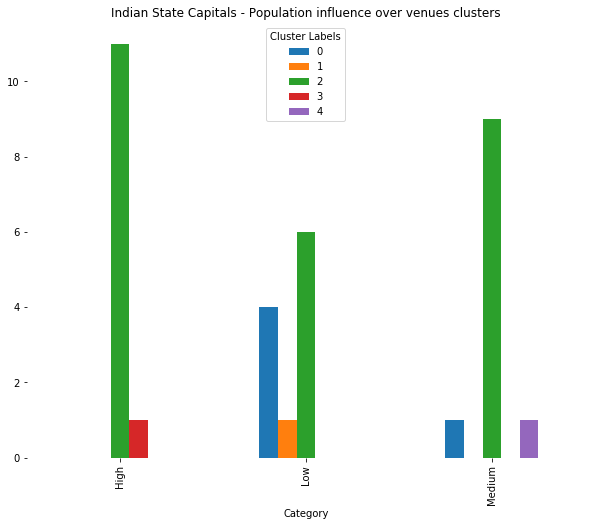

In [633]:
def plotCapitalGraph():
    dfg=capitals_merged.groupby(['Category','Cluster Labels'])['Cluster Labels']
    ax=dfg.count().unstack('Cluster Labels').plot(
        kind='bar',
        figsize=(10,8))
    #ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,t: 'Cluster {}'.format(v)))
    plt.title('Indian State Capitals - Population influence over venues clusters')
    #plt.xlabel('Venues')
    #plt.ylabel('Clusters')
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    plt.show()

plotCapitalGraph()

Suprisingly, cluster 2 which has the most popular venues is also popular across all population category. So, on Indian state capitals, population of the city has no influence over the venue categories. Let us see what are the venues falling under cluster 2.

In [634]:
capitals_merged.loc[capitals_merged['Cluster Labels'] == 2, capitals_merged.columns[[1] + list(range(7, capitals_merged.shape[1]))]]

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mumbai,Indian Restaurant,Café,Cricket Ground,Seafood Restaurant,Bakery,Fast Food Restaurant,Ice Cream Shop,Chinese Restaurant,Coffee Shop,Hotel
1,Bangalore,Indian Restaurant,Hotel,Lounge,Ice Cream Shop,Japanese Restaurant,Italian Restaurant,Breakfast Spot,Park,Bookstore,Restaurant
2,Hyderabad,Indian Restaurant,Multiplex,Fast Food Restaurant,Hotel,Bakery,Café,Ice Cream Shop,Chinese Restaurant,South Indian Restaurant,Juice Bar
3,Chennai,Indian Restaurant,Hotel,Pizza Place,Multiplex,Café,Train Station,Farmers Market,Bookstore,Department Store,Clothing Store
4,Kolkata,Café,Indian Restaurant,Nightclub,Hotel,Bakery,Mughlai Restaurant,Dhaba,Chinese Restaurant,Restaurant,Indian Sweet Shop
5,Jaipur,Hotel,Indian Restaurant,Café,Historic Site,Bakery,Italian Restaurant,Restaurant,Coffee Shop,Tea Room,Ice Cream Shop
6,Lucknow,Indian Restaurant,Fast Food Restaurant,Hotel,Café,Pizza Place,Shopping Mall,Bakery,Multiplex,Department Store,Ice Cream Shop
7,Bhopal,Pizza Place,Indian Restaurant,Coffee Shop,Bakery,Asian Restaurant,Diner,Hotel,Fast Food Restaurant,Café,Department Store
8,Patna,Pizza Place,Café,Indian Restaurant,Hotel,Park,Fast Food Restaurant,Juice Bar,Shopping Mall,Multiplex,Business Service
9,Srinagar,Garden,Café,Hotel,Shopping Mall,Indian Restaurant,Bakery,North Indian Restaurant,Coffee Shop,City,Chinese Restaurant


Let us have a look at all other clusters

In [635]:
capitals_merged.loc[capitals_merged['Cluster Labels'] == 0, capitals_merged.columns[[1] + list(range(7, capitals_merged.shape[1]))]]

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Agartala,Train Station,Coffee Shop,Men's Store,Multiplex,Salad Place,Zoo,Farmers Market,Food Court,Food & Drink Shop,Food
24,Daman,Indian Restaurant,Resort,Hotel,Beach,Train Station,Asian Restaurant,Lighthouse,Restaurant,Casino,Multiplex
28,Amaravati,ATM,Pharmacy,Indian Restaurant,Harbor / Marina,Waterfront,Accessories Store,Food Truck,Food Court,Food & Drink Shop,Food
30,Port Blair,Boat or Ferry,Resort,Beach,Indian Restaurant,Airport,Airport Terminal,Island,Fast Food Restaurant,French Restaurant,Food Truck
31,Itanagar,Ice Cream Shop,Mobile Phone Shop,Train Station,Fried Chicken Joint,Zoo,Farmers Market,Food Truck,Food Court,Food & Drink Shop,Food


In [636]:
capitals_merged.loc[capitals_merged['Cluster Labels'] == 1, capitals_merged.columns[[1] + list(range(7, capitals_merged.shape[1]))]]

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Kavaratti,Boat or Ferry,Bank,Zoo,Gaming Cafe,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food


In [637]:
capitals_merged.loc[capitals_merged['Cluster Labels'] == 3, capitals_merged.columns[[1] + list(range(7, capitals_merged.shape[1]))]]

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Chandigarh,ATM,Fast Food Restaurant,Café,Multiplex,Train Station,Sandwich Place,Food Court,Food & Drink Shop,Food,Flea Market


In [638]:
capitals_merged.loc[capitals_merged['Cluster Labels'] == 4, capitals_merged.columns[[1] + list(range(7, capitals_merged.shape[1]))]]

,Capital,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Imphal,Airport,Airport Lounge,Hotel Bar,Clothing Store,Zoo,Farmers Market,French Restaurant,Food Truck,Food Court,Food & Drink Shop


Now that we know cluster 2 venues are popular across capital cities, let us see what are the top trending venues through a bar graph.

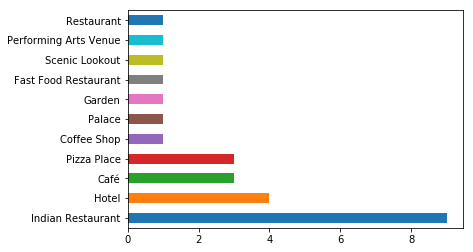

In [639]:
capitals_merged.loc[capitals_merged['Cluster Labels'] == 2, capitals_merged.columns[7]].value_counts().plot(kind='barh')

[<div style="text-align: right"> Back to Contents </div>](#Contents)
## Indian Cities

Let us collect location data for Indian cities using geopy. In interest of time, the location data are already collected in a csv file. If you want to try geopy, uncomment the lines below, comment out the line which load csv data.

In [640]:
#loc=pd.DataFrame(columns=['City','State','Latitude','Longitude'])
#for index, row in dfp.iterrows():
#    print('Processing {}, {} ({})'.format(row['State'],row['Capital'],index))
#    ll=getLatLong('{}, {}, India'.format(row['Capital'],row['State']))
#    print(ll)
#    loc=loc.append(pd.Series([row['Capital'],row['State'],ll['latitude'],ll['longitude']], index=loc.columns),ignore_index=True)
#loc.to_csv('CityLocations.csv', index=False)
loc=pd.read_csv('CityLocations.csv')
dfct=pd.merge(dfp,loc,on=['City','State'])
dfct = dfct.drop(dfct[dfct['City'].isin(dfc['Capital'])].index).reset_index(drop=True)
dfct.sort_values(by=['Population'],inplace=True,ascending=False)
dfct.drop(dfct.loc[dfct['City']=='Delhi'].index,axis=0,inplace=True)
dfct.head()

,City,Population,State,Latitude,Longitude
1,Ahmedabad,5570585,Gujarat,23.021624,72.579707
2,Surat,4467797,Gujarat,21.186461,72.808128
3,Pune,3124458,Maharashtra,18.521428,73.854454
4,Visakhapatnam,2982904,Andhra Pradesh,17.723128,83.301284
5,Nagpur,2405665,Maharashtra,21.149813,79.082056


We will follow all the same process we did for Indian state capitals dataframe. Here, categorizing dataframe by population.

In [641]:
low=round(dfct['Population'].quantile(q=0.33))
medium=round(dfct['Population'].quantile(q=0.66))
conditions=[
    (dfct['Population'] <= low),
    (dfct['Population'] > low) & (dfct['Population'] <= medium), 
    (dfct['Population'] > medium)
]
choices=['Low','Medium','High']
dfct['Category']=np.select(condlist=conditions,choicelist=choices)
dfct.reset_index(drop=True,inplace=True)
dfct.head()


,City,Population,State,Latitude,Longitude,Category
0,Ahmedabad,5570585,Gujarat,23.021624,72.579707,High
1,Surat,4467797,Gujarat,21.186461,72.808128,High
2,Pune,3124458,Maharashtra,18.521428,73.854454,High
3,Visakhapatnam,2982904,Andhra Pradesh,17.723128,83.301284,High
4,Nagpur,2405665,Maharashtra,21.149813,79.082056,High


In [645]:
# get latitude and longitude of India
ll=getLatLong('India')

# create map of India with cities marked using latitude and longitude values of the cities
map_india = folium.Map(width=800,height=800,location=[ll['latitude'],ll['longitude']], zoom_start=4)

# add markers to map
for lat, lng, Population, City, Category in zip(dfct['Latitude'], dfct['Longitude'], dfct['Population'], dfct['City'], dfct['Category']):
    label = '{}, Population: {}'.format(City, Population)
    label = folium.Popup(label, parse_html=True)
    c='green'
    fc='#55aa77'
    if(Category=='High'):
        c='red'
        fc='#ff7755'
    elif(Category=='Medium'):
        c='yellow'
        fc='#aa9955'
    folium.CircleMarker([lat, lng], radius=5, popup=label, color=c, fill=True, fill_color=fc, fill_opacity=0.7,
        parse_html=False).add_to(map_india)  
    
map_india

While Indian state capitals had show a common pattern across cities on population, other India cities shows a mixed population trend. Let us list out top 15 populated Indian cities through a bar graph.

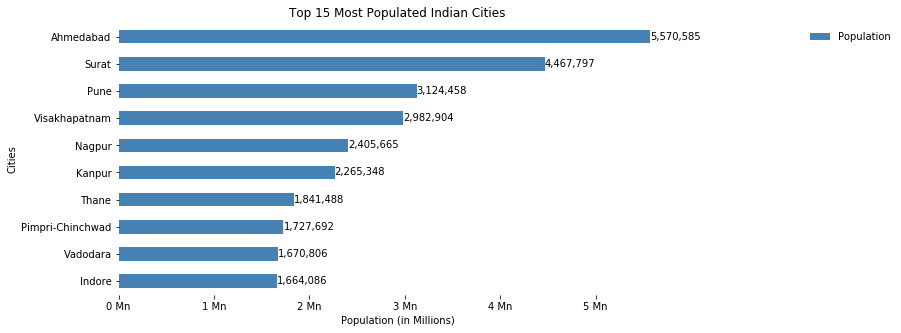

In [646]:
dfc_plt=dfct[['City','Population']].set_index(
    "City",
    drop=True).sort_values(
    by=['Population'],
    ascending=True)['Population'].tail(10)
ax=dfc_plt.plot(kind='barh', figsize=(10,5), color='steelblue')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,t:'{} Mn'.format(int(np.round(v/1000000)))))

plt.title('Top 15 Most Populated Indian Cities')
plt.ylabel('Cities')
plt.xlabel('Population (in Millions)')
for index, value in enumerate(dfc_plt): 
    label = format(int(value), ',') # format int with commas
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value, index - 0.10), color='black')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
plt.show()

Time to go for venue data through foursquare apis. 

In [482]:
# function that call foursquare api and return json venue list
def getFoursquareJsonEx(lat,lng,_limit=100,_option='explore'):
    url = 'https://api.foursquare.com/v2/venues/{}'.format(_option)
    params = dict(
        client_id='3SPEOINY0KTWJE1TB3IMXQ1CLKNR0TTTJJTTU1B1IBSZW1JP',
        client_secret='VJ2Z2P1YAZJ43LU1TYT4JT3FYD1CSIKH2MRNXXJ3E3FLS1JG',
        v='20180605',
        ll='{},{}'.format(lat,lng),
        limit=_limit
        )
    success=False
    counter=5
    venues=None
    while((not success) and counter>0):
        counter-=1
        try:
            results=requests.get(url=url, params=params).json()
            venues = json_normalize(results['response']['groups'][0]['items']) 
            success=True
        except:
            success=False
    return venues

Collect venue details of all cities. Note that there are 301 cities in our dataframe, the below code block may take more time to complete. Also, take care of number of times this code block is being executed, the calls count are added to your foursquare api calls quota.

In [ ]:
venues_list=[]
for i in range(dfct.shape[0]):
    address = '{}, {}, India'.format(dfct.loc[i, 'City'], dfct.loc[i, 'State'])
    print(address)
    venues = getFoursquareJsonEx(dfct.loc[i,'Latitude'],dfct.loc[i,'Longitude'],200)
    columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    try:
        venues =venues.loc[:, columns]
    except:
        print(venues)
        print(sys.exc_info()[0])
        break;
    venues['venue.categories'] = venues.apply(get_category_type, axis=1)
    venues.columns = [col.split(".")[-1].title() for col in venues.columns]
    venues_list.append([(
            dfct.loc[i,'City'], 
            dfct.loc[i,'Latitude'],dfct.loc[i,'Longitude'], 
            venues.loc[j,'Name'], 
            venues.loc[j,'Lat'], 
            venues.loc[j,'Lng'],  
            venues.loc[j,'Categories']) for j in range(venues.shape[0])])
nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['City', 
              'City Latitude', 
              'City Longitude', 
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Category']
#nearby_venues.to_csv('city_venues.csv')

In [484]:
#nearby_venues=pd.read_csv('city_venues.csv')
nearby_venues.head()    

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ahmedabad,23.021624,72.579707,Manek Chowk Khau Gali,23.023505,72.588539,Snack Place
1,Ahmedabad,23.021624,72.579707,Manek Chowk,23.023626,72.588553,Fast Food Restaurant
2,Ahmedabad,23.021624,72.579707,Lucky Tea,23.027829,72.581394,Tea Room
3,Ahmedabad,23.021624,72.579707,Agashiye,23.027104,72.581614,Indian Restaurant
4,Ahmedabad,23.021624,72.579707,Hotel Patang,23.026421,72.572185,Indian Restaurant


In [485]:
print('There are total {} venues in all popular Indian cities and there are {} uniques venue categories.'.format(
    nearby_venues.shape[0],len(nearby_venues['Venue Category'].unique())))

There are total 5896 venues in all popular Indian cities and there are 271 uniques venue categories.


In [486]:
venue_dummies = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venue_dummies['City'] = nearby_venues['City'] 

# move neighborhood column to the first column
columns = [venue_dummies.columns[-1]] + list(venue_dummies.columns[:-1])
venue_dummies = venue_dummies[columns]

venue_dummies.head()

,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Volleyball Court,Watch Shop,Water Park,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [487]:
venues_grouped = venue_dummies.groupby('City').mean().reset_index()
print(venues_grouped.shape)
venues_grouped.head()

(275, 271)


,City,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,...,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Volleyball Court,Watch Shop,Water Park,Wings Joint,Women's Store
0,Adoni,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Agra,0.00,0.0,0.0,0.0,0.016129,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ahmedabad,0.01,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ahmednagar,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ajmer,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let us create a top venues dataframe to list out top 15 most common venues for each Indian cities in our dataframe.

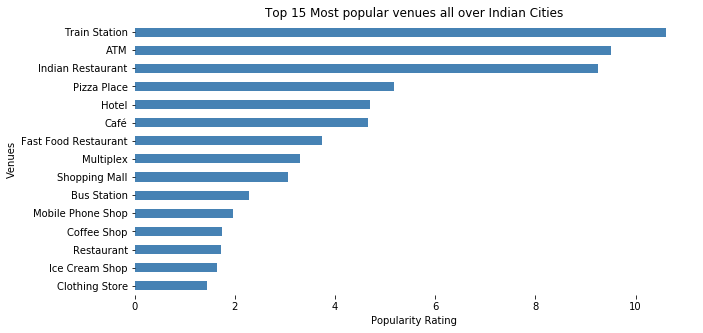

In [488]:
popular=venues_grouped.describe().loc['mean'].sort_values().tail(15)

ax=popular.plot(kind='barh', figsize=(10,5), color='steelblue')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,t: int(np.round(v*100))))

plt.title('Top 15 Most popular venues all over Indian Cities')
plt.ylabel('Venues')
plt.xlabel('Popularity Rating')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
plt.show()

Though we see Train Station keeps the top position, the first commercial venue in the top list is Indian Restaurant again. As we have seen earlier “Indian Restaurant, Hotels and Cafes” keep their top position in popular venues categories for Indian cities.

In [489]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
top_venues_sorted = pd.DataFrame(columns=columns)
top_venues_sorted['City'] = venues_grouped['City']

for ind in np.arange(venues_grouped.shape[0]):
    top_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

top_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adoni,Indian Restaurant,Bus Station,Motorcycle Shop,Department Store,Train Station,Fish & Chips Shop,Farm,Farmers Market,Fast Food Restaurant,Field
1,Agra,Hotel,Indian Restaurant,Historic Site,Resort,Fast Food Restaurant,Café,Multicuisine Indian Restaurant,Market,Pizza Place,Coffee Shop
2,Ahmedabad,Indian Restaurant,Fast Food Restaurant,Café,Hotel,Pizza Place,Tea Room,Sandwich Place,Coffee Shop,Snack Place,Ice Cream Shop
3,Ahmednagar,Indian Restaurant,Italian Restaurant,Multiplex,Pizza Place,Coffee Shop,Food,Food & Drink Shop,Flea Market,Fish Market,Fabric Shop
4,Ajmer,Hotel,Indian Restaurant,Café,Lake,Vegetarian / Vegan Restaurant,Pizza Place,Design Studio,Monument / Landmark,Bakery,Coffee Shop


There are many models for clustering, we will be using k-means clustering – one of the vastly used clustering model that especially useful if you need to quickly discover insights from unlabeled data. Time to apply k-means clustering model on our dataframe to cluster the popular venues.

In [491]:
cities_grouped_clustering = venues_grouped.drop('City', 1)

First, let us use Elbow method to identify the K value for k-means clustering algorithm.

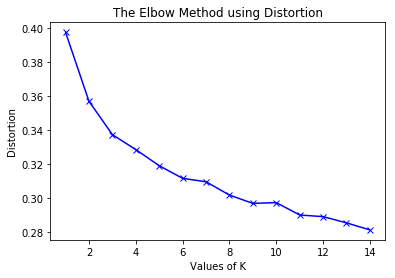

In [493]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,15)
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(cities_grouped_clustering) 
      
    distortions.append(sum(np.min(cdist(cities_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / cities_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(cities_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / cities_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

Elbow method shows value 6 as the optimal value to use.

In [494]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 1, 1, 5, 1, 4, 1, 1, 2, 2])

Let us add the cluster results to our original dataframe of city capitals

In [495]:
try:
    top_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    pass
cities_merged = dfct

cities_merged = cities_merged.join(top_venues_sorted.set_index('City'), on='City')

cities_merged.head()

,City,Population,State,Latitude,Longitude,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahmedabad,5570585,Gujarat,23.021624,72.579707,High,1,Indian Restaurant,Fast Food Restaurant,Café,Hotel,Pizza Place,Tea Room,Sandwich Place,Coffee Shop,Snack Place,Ice Cream Shop
1,Surat,4467797,Gujarat,21.186461,72.808128,High,1,Fast Food Restaurant,Indian Restaurant,Pizza Place,Chinese Restaurant,Restaurant,Café,Tea Room,Sandwich Place,Ice Cream Shop,Shopping Mall
2,Pune,3124458,Maharashtra,18.521428,73.854454,High,5,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Snack Place,Sandwich Place,Café,Restaurant,Seafood Restaurant
3,Visakhapatnam,2982904,Andhra Pradesh,17.723128,83.301284,High,1,Indian Restaurant,Café,Hotel,Snack Place,Ice Cream Shop,Restaurant,Multiplex,Bakery,Food Court,Indie Movie Theater
4,Nagpur,2405665,Maharashtra,21.149813,79.082056,High,1,Indian Restaurant,Coffee Shop,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Restaurant,Bakery,Snack Place,Sandwich Place,Café


Now we have the dataframe categorized by population and clusterd by venues of the cities, time to visualize the result on a folium map. Note that, border of the markers on the map indicate the population category, whereas fill color of markers indicate the cluster of venues.

In [496]:
from folium.features import DivIcon
# create map
map_clusters = folium.Map(location=[ll['latitude'], ll['longitude']], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []

for lat, lon, poi, cluster, Category in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['City'], cities_merged['Cluster Labels'], cities_merged['Category']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    c='green'
    fc='#55aa77'
    if(Category=='High'):
        c='red'
        fc='#ff7755'
    elif(Category=='Medium'):
        c='yellow'
        fc='#aa9955'
    folium.CircleMarker([lat, lon], radius=7, popup=label, color=c, fill=True, fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

The clustering result of venues data shows that venue categories are not so similar across Indian cities and also too many data points on the map of Indian cities above may seems to be confusing to analyze the venue popularity. So, let’s plot a simple bar graph to look into more details

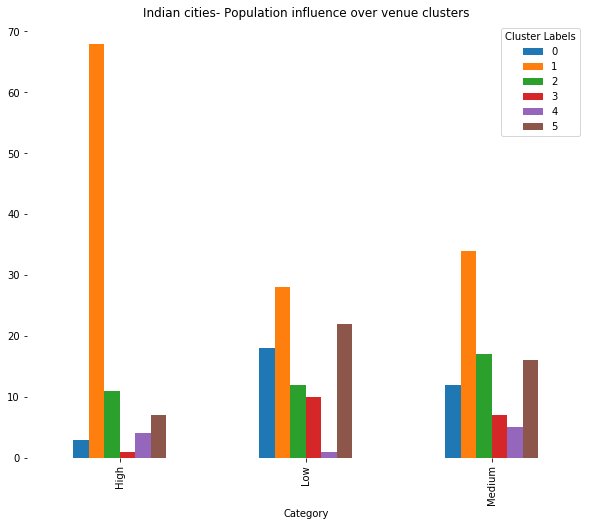

In [594]:
def plotCityGraph():
    dfg=cities_merged.groupby(['Category','Cluster Labels'])['Cluster Labels']
    ax=dfg.count().unstack('Cluster Labels').plot(
        kind='bar',
        figsize=(10,8))
    #ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,t: 'Cluster {}'.format(v)))
    plt.title('Indian cities- Population influence over venue clusters')
    #plt.xlabel('Venues')
    #plt.ylabel('Clusters')
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    plt.show()

plotCityGraph()

The bar graph above reveals a surprising fact that, regardless of population, cluster 1 (orange bar) is common across Indian cities. Let us look at the cluster 1 to see the venues,

In [356]:
cities_merged.loc[cities_merged['Cluster Labels'] == 1, cities_merged.columns[[0] + list(range(7, cities_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahmedabad,Indian Restaurant,Fast Food Restaurant,Café,Hotel,Pizza Place,Tea Room,Sandwich Place,Coffee Shop,Snack Place,Ice Cream Shop
1,Surat,Fast Food Restaurant,Indian Restaurant,Pizza Place,Chinese Restaurant,Restaurant,Café,Tea Room,Sandwich Place,Ice Cream Shop,Shopping Mall
2,Pune,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Snack Place,Sandwich Place,Café,Restaurant,Seafood Restaurant
3,Visakhapatnam,Indian Restaurant,Café,Hotel,Snack Place,Ice Cream Shop,Restaurant,Multiplex,Bakery,Food Court,Indie Movie Theater
4,Nagpur,Indian Restaurant,Coffee Shop,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Restaurant,Bakery,Snack Place,Sandwich Place,Café
6,Thane,Indian Restaurant,Fast Food Restaurant,Ice Cream Shop,Hotel,Coffee Shop,Chinese Restaurant,Seafood Restaurant,Donut Shop,Vegetarian / Vegan Restaurant,Clothing Store
7,Pimpri-Chinchwad,Indian Restaurant,Fast Food Restaurant,Pizza Place,Snack Place,Hotel,Café,Sandwich Place,Ice Cream Shop,Shopping Mall,Diner
8,Vadodara,Indian Restaurant,Fast Food Restaurant,Café,Multiplex,Pizza Place,Shopping Mall,Italian Restaurant,Sandwich Place,Snack Place,Asian Restaurant
9,Indore,Indian Restaurant,Fast Food Restaurant,Hotel,Coffee Shop,Pizza Place,Café,Ice Cream Shop,Sandwich Place,Snack Place,Tea Room
10,Ghaziabad,Indian Restaurant,Fast Food Restaurant,Pizza Place,Park,Shopping Mall,Bakery,Donut Shop,Arcade,Coffee Shop,Train Station


Let us look at 1st most common venues across Indian cities.

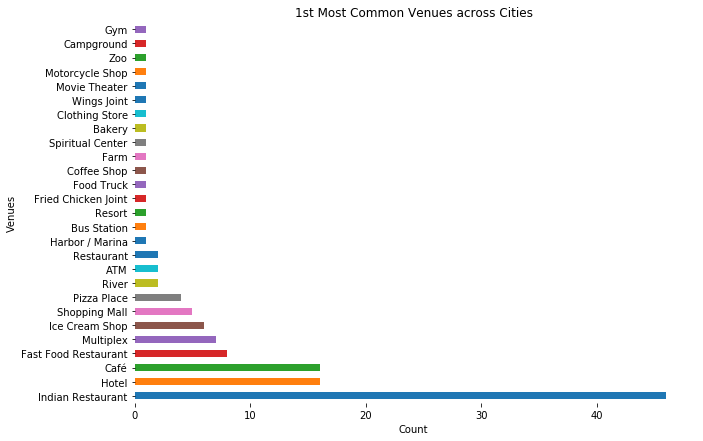

In [595]:
ax=cities_merged.loc[cities_merged['Cluster Labels'] == 1, cities_merged.columns[7]].value_counts().plot(kind='barh', figsize=(10,7))
plt.title('1st Most Common Venues across Cities')
plt.xlabel('Count')
plt.ylabel('Venues')
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
plt.show()

[<div style="text-align: right"> Back to Contents </div>](#Contents)
## Verdict

Time to compare both the analysis results, let us compare the most popular venues across Indian cities and state capitals based on the identified cluster in above analysis.

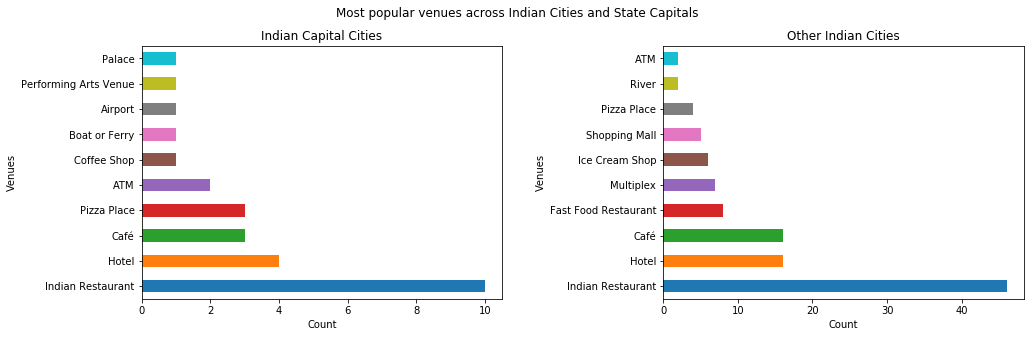

In [596]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('Most popular venues across Indian Cities and State Capitals')


capitals_merged.loc[capitals_merged['Cluster Labels'] == 0, capitals_merged.columns[7]].value_counts().head(10).plot(kind='barh', 
                                                                                                        figsize=(15, 5),
                                                                                                        ax=ax[0])
ax[0].set_title('Indian Capital Cities')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Venues')

cities_merged.loc[cities_merged['Cluster Labels'] == 1, cities_merged.columns[7]].value_counts().head(10).plot(kind='barh', 
                                                                                                      figsize=(15, 5),
                                                                                                      ax=ax[1])
ax[1].set_title('Other Indian Cities')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Venues')

fig.tight_layout(pad=3.0)

plt.show()

As we have seen earlier “Indian Restaurant, Hotels and Cafes” keep their top position in popular venues categories for Indian state capitals and Indian cities show, they are not so different from capital cities venue popularity.

Let’s put all the top 10 popular venues together to find the frequency of each of the venue category to find out which business stands top. The below figure is the summary of all top 10 venues across cities on corresponding dataset based on the frequency of the venue occurrences. The chart reveals that “Indian Restaurant, Hotel and Café’ keeps the top position in Indian state capitals and Indian cities, though looks different, considering commercial venues, it’s no different from capital cities. 

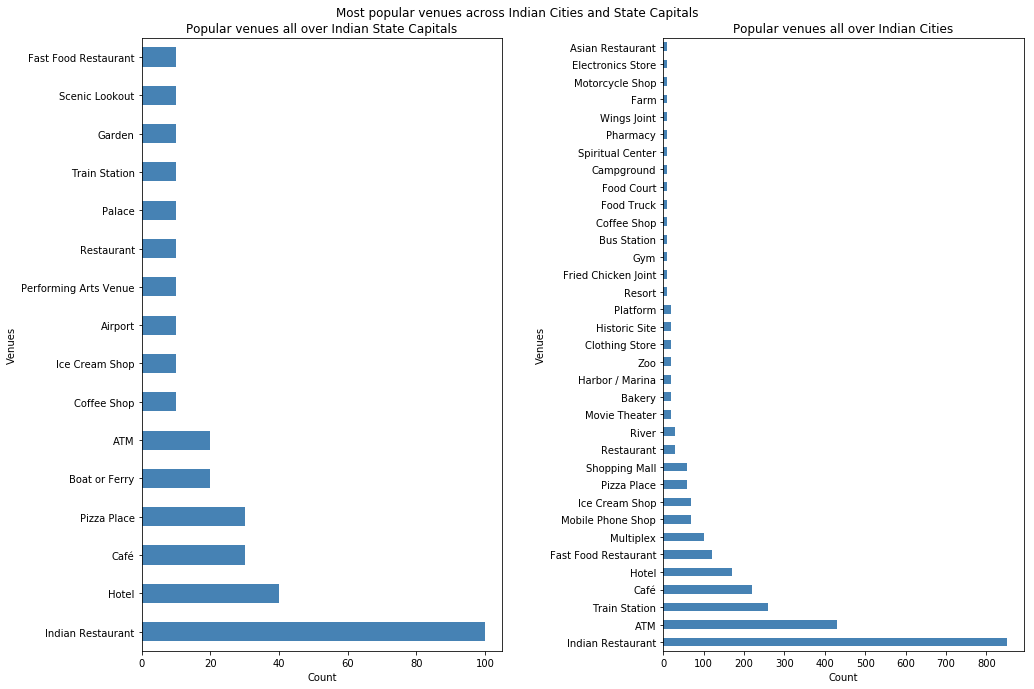

In [593]:
capital_venue_counts={}
for i in range(7, capitals_merged.shape[1]):
    res=capitals_merged.iloc[:,7].value_counts()
    for k in res.keys():
        if(k not in capital_venue_counts.keys()):
            capital_venue_counts[k]=0
        capital_venue_counts[k]+=res[k] 
        
city_venue_counts={}
for i in range(7, cities_merged.shape[1]):
    res=cities_merged.iloc[:,7].value_counts()
    for k in res.keys():
        if(k not in city_venue_counts.keys()):
            city_venue_counts[k]=0
        city_venue_counts[k]+=res[k] 
        
fig, ax = plt.subplots(1, 2)
fig.suptitle('Most popular venues across Indian Cities and State Capitals')

pd.DataFrame.from_dict(capital_venue_counts, orient='index').plot(kind='barh', figsize=(15, 10), color='steelblue', ax=ax[0])
ax[0].get_legend().remove()
ax[0].set_title('Popular venues all over Indian State Capitals')
ax[0].set_ylabel('Venues')
ax[0].set_xlabel('Count')

pd.DataFrame.from_dict(city_venue_counts, orient='index').plot(kind='barh', figsize=(15, 10), color='steelblue', ax=ax[1])
ax[1].get_legend().remove()
ax[1].set_title('Popular venues all over Indian Cities')
ax[1].set_ylabel('Venues')
ax[1].set_xlabel('Count')
fig.tight_layout(pad=3.0)

plt.show()

[<div style="text-align: right"> Back to Contents </div>](#Contents)
## Conclusion

Though we have a hand full of businesses running in cities across India, the analysis shows business under “Indian Restaurant, Hotel and Café’ categories running successfully regardless of population, status of the cities. The best option to start a business could possibly be one of these top 3 categories. However, rest of the venues are not to be left out, comparing the venues across both data sets, it clearly indicates that there are more travelling people across cities (note Train Station have a position in both the datasets), hence the restaurants, hotels, cafe are leading on its position.

So answers for business startups in India are,
    1. Business under “Indian Restaurant, Hotel, Café” category, be it capital city or other cities
    2. Population doesn’t have any impact on these top venues
    3. Business close to Train stations, Airports
    4. Business which deals with travelling people
